In [1]:
import numpy as np
import pandas as pd
import sqlite3

In [2]:
conn = sqlite3.connect('academy.db')
cur = conn.cursor()

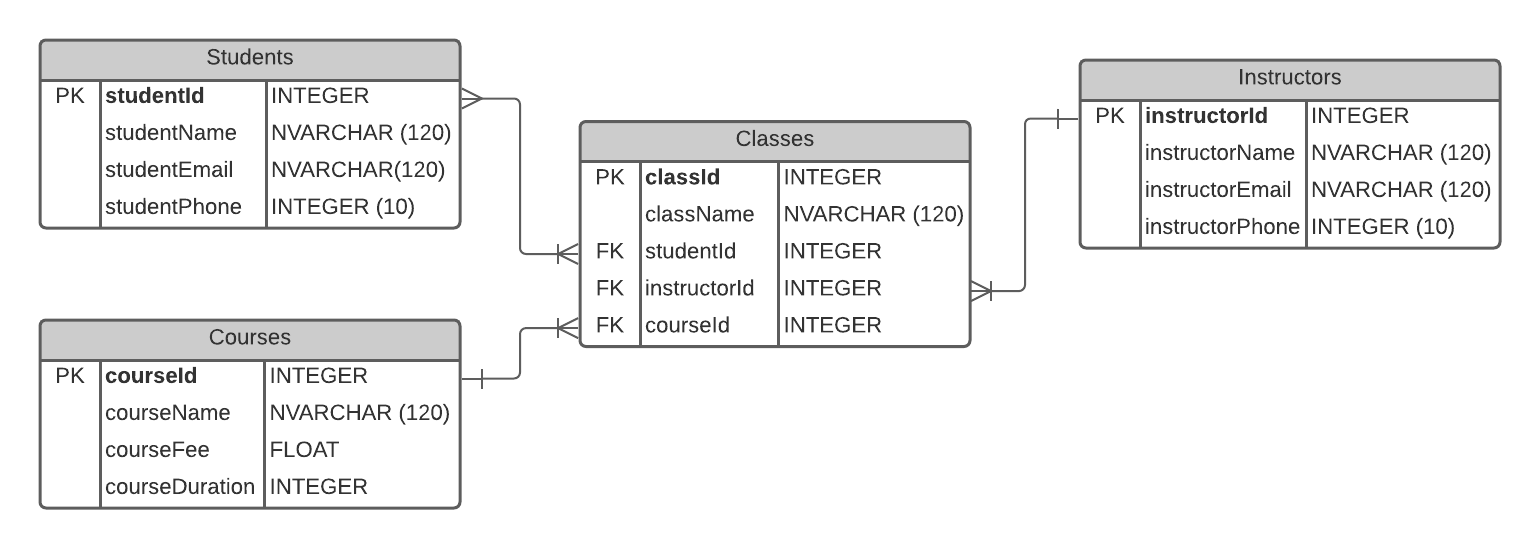

In [3]:
%matplotlib inline
from IPython.display import Image
Image(filename='Academydb.png', width=500)

In [4]:
# Create the Students table
students = cur.execute("""CREATE TABLE Students (studentId INTEGER PRIMARY KEY, 
                                                    studentName NVARCHAR(120) NOT NULL,
                                                    studentEmail NVARCHAR(120), 
                                                    studentPhone INTEGER (10))""")
conn.commit()                  

In [5]:
# Create the Instructors table
instructors = cur.execute("""CREATE TABLE Instructors (instructorId INTEGER PRIMARY KEY, 
                                                    instructorName NVARCHAR(120) NOT NULL,
                                                    instructorEmail NVARCHAR(120) NOT NULL, 
                                                    instructorPhone INTEGER (10))""")
conn.commit()  

In [6]:
# Create the Courses table
courses = cur.execute("""CREATE TABLE Courses (courseId INTEGER PRIMARY KEY, 
                                            courseName NVARCHAR(120) NOT NULL,
                                            courseFee FLOAT, 
                                            courseDuration INTEGER)""")
conn.commit()  

In [7]:
# Create the Classes table
classes = cur.execute("""CREATE TABLE Classes (
                        classId INTEGER PRIMARY KEY, 
                        className NVARCHAR(120) NOT NULL,
                        studentId INTEGER UNIQUE, 
                        instructorId INTEGER UNIQUE, 
                        courseId INTEGER UNIQUE,
                        FOREIGN KEY (studentId) REFERENCES Students(studentId) ON UPDATE CASCADE ON DELETE CASCADE,
                        FOREIGN KEY (instructorId) REFERENCES Instructors(instructorId) ON UPDATE CASCADE ON DELETE CASCADE,
                        FOREIGN KEY (courseId) REFERENCES Courses(courseId) ON UPDATE CASCADE ON DELETE CASCADE)"""
                     )
conn.commit()  

In [8]:
# Populate data in the created tables
students_sample = [
    ('Ethan Kingston', 'etKing@gmail.com', 6728191902),
    ('Andy Shaun', 'anShaun@gmail.com', 5234283112),
    ('Charles George', 'chGeorge@gmail.com', 7812391382),
    ('Owen Peterson', 'owPeterson@gmail.com', 8492473874),
    ('Ben Shapiro', 'benShapie@gmail.com', 9038742428),
    ('Steven Crowder', 'steCrow@gmail.com', 5739370204),
]
query = "INSERT INTO Students (studentName, studentEmail , studentPhone) VALUES(?,?,?)"
cur.executemany(query, students_sample)
conn.commit()

In [9]:
instructors_sample = [
    ('Chris Kelly', 'chKelly@gmail.com', 3743926443),
    ('Glenn Hoff', 'glenHoff@gmail.com', 4823738293),
    ('Amanda Postak', 'amanPost@gmail.com', 8462833232),
    ('Kevin Carlson', 'kevCarl@gmail.com', 9839827482),
    ('Andre Perez', 'andrPer@gmail.com', 7362874729),
    ('Simon Tran', 'simTran@gmail.com', 5552735180),
]
query = "INSERT INTO Instructors (instructorName, instructorEmail , instructorPhone) VALUES(?,?,?)"
cur.executemany(query, instructors_sample)
conn.commit()

In [10]:
courses_sample = [
    ('Python', 2000.90, 60),
    ('Java', 1800.50, 60),
    ('Linux', 1500.50, 45),
    ('Windows', 1750.50, 40),
    ('Security', 1950.00, 60),
    ('Capstone', 2100.00, 50),
]
query = "INSERT INTO Courses (courseName, courseFee, courseDuration) VALUES(?,?,?)"
cur.executemany(query, courses_sample)
conn.commit()

In [11]:
classes_sample = [
    ('PythonOL01', 1, 1, 1),
    ('JavaOL02', 2, 2, 2),
    ('LinuxOL03', 3, 3, 3),
    ('Windows01', 4, 4, 4),
    ('SecurityOL02', 5, 5, 5),
    ('Capstone02', 6, 6, 6),
]
query = "INSERT INTO Classes (className, studentId, instructorId, courseId) VALUES(?,?,?,?)"
cur.executemany(query, classes_sample)
conn.commit()

In [12]:
# students_fetch =  cur.execute("SELECT * FROM Students").fetchall()
# instructors_fetch =  cur.execute("SELECT * FROM Instructors").fetchall()
# courses_fetch =  cur.execute("SELECT * FROM Courses").fetchall()
# classes_fetch = cur.execute("SELECT * FROM Classes").fetchall()
# print(students_fetch, '\n')
# print(instructors_fetch,'\n')
# print(courses_fetch, '\n')
# print(classes_fetch)

In [13]:
# The list of students
student_list = cur.execute("""SELECT studentName AS 'Student Name' FROM Students""").fetchall()
studentDF = pd.DataFrame(student_list, columns = [item[0] for item in cur.description])
studentDF.head(5)

,Student Name
0,Ethan Kingston
1,Andy Shaun
2,Charles George
3,Owen Peterson
4,Ben Shapiro


In [14]:
# The list of classes
class_list = cur.execute("""SELECT className AS 'Class Name' FROM Classes""").fetchall()
classDF = pd.DataFrame(class_list, columns = [item[0] for item in cur.description])
classDF.head(5)

,Class Name
0,PythonOL01
1,JavaOL02
2,LinuxOL03
3,Windows01
4,SecurityOL02


In [15]:
# The list of instructors
instructors_list = cur.execute("""SELECT instructorName AS 'Instructor Name' FROM Instructors""").fetchall()
instructorsDF = pd.DataFrame(instructors_list, columns = [item[0] for item in cur.description])
instructorsDF.head(5)

,Instructor Name
0,Chris Kelly
1,Glenn Hoff
2,Amanda Postak
3,Kevin Carlson
4,Andre Perez


In [16]:
# The list of courses
course_list = cur.execute("""SELECT courseName AS 'Course Name' FROM Courses""").fetchall()
courseDF = pd.DataFrame(course_list, columns = [item[0] for item in cur.description])
courseDF.head(5)

,Course Name
0,Python
1,Java
2,Linux
3,Windows
4,Security


In [17]:
# cur.execute("""DROP TABLE IF EXISTS Classes""")

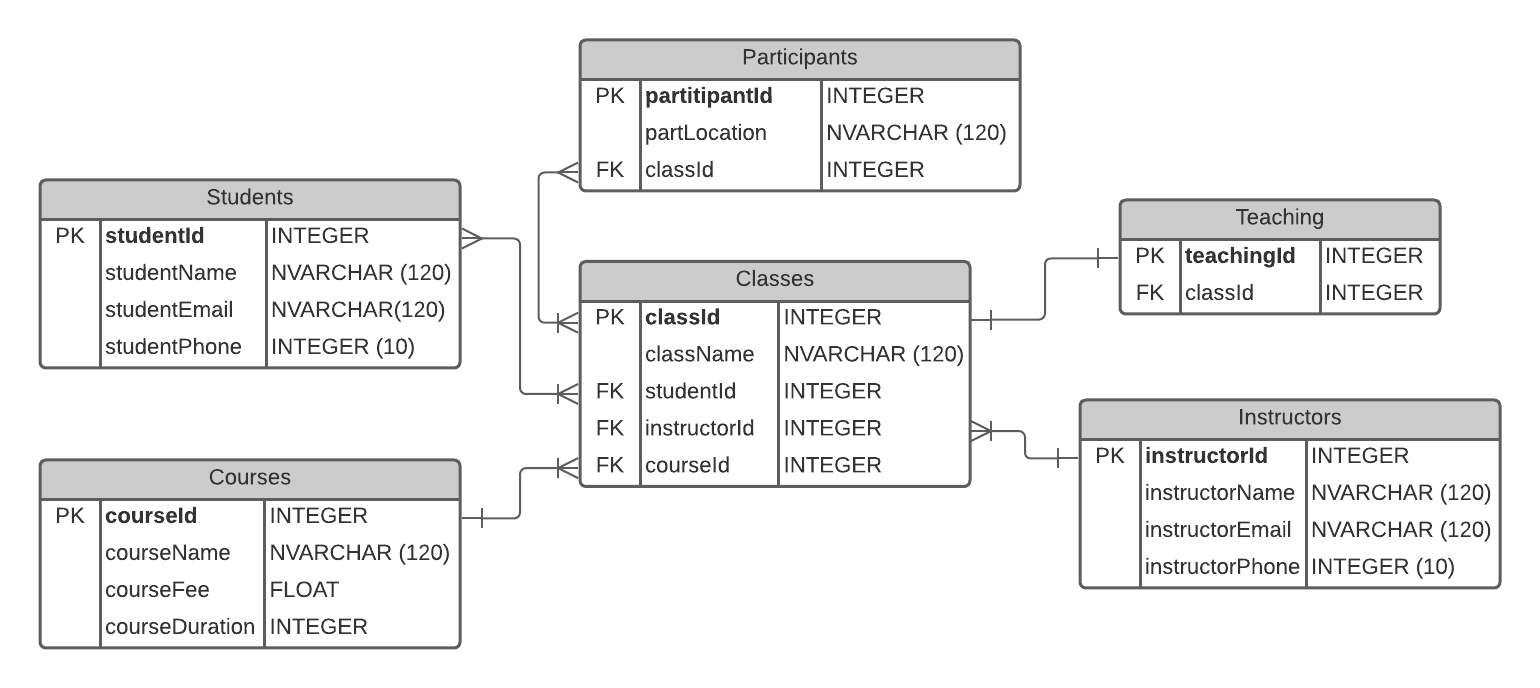

In [18]:
Image(filename='Academydb_amend.png', width=500)

In [19]:
participants = cur.execute("""CREATE TABLE Participants (participantId INTEGER PRIMARY KEY, 
                                                    partLocation NVARCHAR(120), 
                                                    classId INTEGER,
                                                    FOREIGN KEY (classID) REFERENCES Classes(classId)
                                                    ON UPDATE CASCADE ON DELETE CASCADE )""")

conn.commit()  

In [20]:
teaching = cur.execute("""CREATE TABLE Teaching (teachingId INTEGER PRIMARY KEY, 
                                                classId INTEGER,
                                                FOREIGN KEY (classID) REFERENCES Classes(classId)
                                                ON UPDATE CASCADE ON DELETE CASCADE )""")

conn.commit()  

In [21]:
participant_sample = [(1, 'Online'), (2, 'WR116'), (3,'Online'), (4, 'MC630'), (5, 'Online'), (6, 'HL242'),]
query = """INSERT INTO Participants (classId, partLocation) VALUES(?,? )"""
cur.executemany(query, participant_sample)
conn.commit()

In [22]:
cur.execute("INSERT INTO Teaching (classId) VALUES(1)")
cur.execute("INSERT INTO Teaching (classId) VALUES(2)")
cur.execute("INSERT INTO Teaching (classId) VALUES(3)")
cur.execute("INSERT INTO Teaching (classId) VALUES(4)")
cur.execute("INSERT INTO Teaching (classId) VALUES(5)")
cur.execute("INSERT INTO Teaching (classId) VALUES(6)")
conn.commit()

In [23]:
participant_fetch = cur.execute("""SELECT * FROM Participants""").fetchall()
teaching_fetch = cur.execute("""SELECT * FROM Teaching""").fetchall()
# participant_fetch
# teaching_fetch

In [24]:
# (1) Mỗi môn học đã tổ chức được bao nhiêu lớp?
courseClass = cur.execute("""SELECT cs.courseName AS 'Course Name', COUNT(cl.classId) AS 'Class No.'
                            FROM Classes AS cl,
                            (SELECT courseId, courseName 
                            FROM Courses) AS cs 
                            GROUP BY cs.courseName
                            ORDER BY cs.courseName ASC
                            """).fetchall()
courseClassCols = [item[0] for item in cur.description]
courseClassDF = pd.DataFrame(courseClass, columns = courseClassCols)
courseClassDF

,Course Name,Class No.
0,Capstone,6
1,Java,6
2,Linux,6
3,Python,6
4,Security,6
5,Windows,6


In [25]:
# (2) Mỗi lớp học có bao nhiêu học viên?
classStudent = cur.execute("""SELECT ClassName AS 'Class Name', COUNT(StudentId) AS 'Student No.'
                            FROM Classes
                            GROUP BY ClassName
                            """).fetchall()
classStudentCols = [item[0] for item in cur.description]
classStudentDF = pd.DataFrame(classStudent, columns = classStudentCols)
classStudentDF

,Class Name,Student No.
0,Capstone02,1
1,JavaOL02,1
2,LinuxOL03,1
3,PythonOL01,1
4,SecurityOL02,1
5,Windows01,1


In [26]:
# (3) Mỗi giảng viên đã dạy bao nhiêu lớp?
classTeach = cur.execute("""SELECT tec.teachingId, cls.instructorId
                            FROM Teaching AS tec,
                            (SELECT classId AS 'Class No.', instructorId
                            FROM Classes
                            GROUP BY instructorId) AS cls
                            GROUP BY cls.instructorId
                            """).fetchall()
classTeachDF = pd.DataFrame(classTeach, columns=[item[0] for item in cur.description])
classTeachDF

,teachingId,instructorId
0,1,1
1,1,2
2,1,3
3,1,4
4,1,5
5,1,6


In [27]:
# (4) Mỗi học viên đã học bao nhiêu lớp?
stuCls = cur.execute("""SELECT stu.studentId, par.participantId
                        FROM Participants AS par,
                        (SELECT classId, studentId
                        FROM Classes
                        GROUP BY studentId) AS stu
                        GROUP BY studentId
                        """).fetchall()
stuClsDF = pd.DataFrame(stuCls, columns = [item[0] for item in cur.description])
stuClsDF                      

,studentId,participantId
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1
5,6,1


In [28]:
import pandasql as pdsql
from pandasql import sqldf, PandaSQL
# print(pdsql)
# print(sqldf)
# print(PandaSQL)

In [29]:
productDF = pd.read_csv('data-instacart/products.csv')
productDF.head(3)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7


In [30]:
aisleProductDF = productDF[['product_id', 'aisle_id']]
aisleProductDF = aisleProductDF.sort_values('aisle_id').sort_values('product_id', ascending = False)
aisleProductDF.rename(columns={'product_id': 'Product_Counts'}, inplace = True)
aisleProductDF.head()

,Product_Counts,aisle_id
49687,49688,73
49686,49687,41
49685,49686,112
49684,49685,42
49683,49684,124


In [31]:
# aisleProductDF2 = productDF[['product_id', 'aisle_id']]
# aisleProductDF2 = aisleProductDF2.groupby(['aisle_id'], as_index=False).agg('count').sort_values('product_id', ascending = False)
# aisleProductDF2.head()

In [32]:
aisleDF = pd.read_csv('data-instacart/aisles.csv')
aisleDF.head(3)

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars


In [33]:
# aisleDF.iloc[:, 0]
# aisleDF['aisle_id']
# aisleDF.loc[:,'aisle_id']
# aisleProd = pd.merge(aisleDF, productDF, on = 'aisle_id') #.loc[:, ['aisle_id','aisle', 'product_id']]
# aisleProd.head(3)

In [34]:
pdsqlObj = PandaSQL()

In [35]:
pdsqlObj("""SELECT a.aisle, p.Product_Counts 
            FROM aisleDF a
            INNER JOIN aisleProductDF AS p
            ON a.aisle_id = p.aisle_id
            GROUP BY a.aisle
            ORDER BY Product_Counts DESC
            LIMIT 10 """)

,aisle,Product_Counts
0,indian foods,2190
1,packaged produce,1672
2,eggs,1541
3,frozen juice,1280
4,refrigerated pudding desserts,1258
5,seafood counter,1153
6,bulk dried fruits vegetables,1000
7,canned fruit applesauce,986
8,trash bags liners,979
9,baby bath body care,956


In [36]:
departmentDF = pd.read_csv('data-instacart/departments.csv')
departmentDF.head(3)

,department_id,department
0,1,frozen
1,2,other
2,3,bakery


In [37]:
pdsqlObj("""SELECT COUNT(d.department) AS 'Department Count', d.department AS 'Department Name'
            FROM departmentDF d
            INNER JOIN productDF p
            ON d.department_id = p.department_id
            GROUP BY p.department_id
            ORDER BY COUNT(d.department) DESC
            LIMIT (10)""")

,Department Count,Department Name
0,6563,personal care
1,6264,snacks
2,5371,pantry
3,4365,beverages
4,4007,frozen
5,3449,dairy eggs
6,3085,household
7,2092,canned goods
8,1858,dry goods pasta
9,1684,produce
